In [13]:
## importando bibliotecas

import pandas as pd
import numpy as np

import tensorflow as tf

from sklearn import preprocessing
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
## gerando os dados
npts = 5000
dados = pd.DataFrame()
x = -1+2*np.random.rand(npts)
y = -1+2*np.random.rand(npts)
lbl = 0.3*(-1+2*np.random.rand(npts))
label = [int(x[i]**2+y[i]**2<0.7+lbl[i]) for i in range(npts)]


# label = [int ()]
dados["x"] = x
dados["y"] = y
dados["label"] = label

# test_size = int(len(dados) * 0.1)
# train = dados.iloc[:-test_size,:].copy() 
# test = dados.iloc[-test_size:,:].copy()

# X_train = train.drop("label",axis=1).copy()
# X_test = test.drop("label",axis=1).copy()

# # y_train = train[["label"]].copy()
# # y_test = test[["label"]].copy()

# normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
# # #normalizer = preprocessing.Normalizer()
# normalizer.fit(X_train)
# normalized_train_X = normalizer.transform(X_train)
# normalized_test_X = normalizer.transform(X_test)

# y_train = np.array(train[["label"]].copy()).reshape(-1)
# y_test = np.array(test[["label"]].copy()).reshape(-1)

 

In [ ]:
## rede neural keras
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(10, activation='elu'),
  tf.keras.layers.Dense(10, activation='elu'),
  tf.keras.layers.Dense(10, activation='elu'),
  tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
  optimizer='adam',
  loss='mse',
  metrics= ["accuracy"]
  )

hst = model.fit(normalized_train_X,y_train, epochs=50)
model.evaluate(normalized_test_X,y_test,verbose=2)
# ypred = model(normalized_test_X, training=False) 
# res = pd.DataFrame(data={"dados":[x[0] for x in y_test ],"predito":[ int(x[0]>0.5) for x in ypred]})
# plt.plot(hst.history["accuracy"])
# res


In [ ]:
## rede neural sklearn
clfnn = MLPClassifier(hidden_layer_sizes=(3, 10,10,10), alpha=1e-5,verbose=True, learning_rate="adaptive",max_iter=500)
clfnn.fit(normalized_train_X, y_train)
clfnn.score(normalized_test_X,y_test)

In [ ]:
## arvore de decisão 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(normalized_train_X, y_train)
clf.score(normalized_test_X,y_test)

In [ ]:
## suport vector machine
clfsvm = NuSVC(tol=1e-05,verbose=True,gamma="auto")
clfsvm.fit(normalized_train_X, y_train)
clfsvm.score(normalized_test_X,y_test)

In [ ]:
clfrf = RandomForestClassifier(n_estimators=10,verbose=True)
clfrf.fit(normalized_train_X,y_train)
clfrf.score(normalized_test_X,y_test)

In [ ]:
# plt.scatter([z[0] for z in normalized_test_X],[z[1] for z in normalized_test_X],c=y_test,cmap = plt.cm.Paired)

ypred_keras = model.predict(normalized_test_X)
yok = [int(x[0]>0.5) for x in ypred_keras]

aux = "true"
MatrixKeras = confusion_matrix(y_test,yok,normalize=aux)#, columns=["pred_v","pred_f"],index=["teste_v","teste_f"]
MatrixSK_NN = confusion_matrix(y_test,clfnn.predict(normalized_test_X),normalize=aux)#, columns=["pred_v","pred_f"],index=["teste_v","teste_f"]
MatrixSK_Tree =confusion_matrix(y_test,clf.predict(normalized_test_X),normalize=aux)#, columns=["pred_v","pred_f"],index=["teste_v","teste_f"]
MatrixSK_SVM = confusion_matrix(y_test,clfsvm.predict(normalized_test_X),normalize=aux)

MatrixSK_NN
MatrixKeras
MatrixSK_Tree
MatrixSK_SVM[:][0]
TPR = [MatrixKeras[0][0],MatrixSK_NN[0][0], MatrixSK_Tree[0][0],MatrixSK_SVM[0][0]]
FPR = [MatrixKeras[1][0],MatrixSK_NN[1][0], MatrixSK_Tree[1][0],MatrixSK_SVM[1][0]]

ax2 = plt.plot(FPR,TPR,'o',[0,1],[0,1],'--')
plt.xlim(0,1)
plt.ylim(0,1)


In [ ]:
feature_1, feature_2 = np.meshgrid(np.linspace(0,1,200),np.linspace(0,1,200))
avaliar = np.c_[feature_1.ravel(),feature_2.ravel()]
# ypred_keras = model.predict(avaliar)
# y_pred = np.reshape([int(x[0]>0.5) for x in ypred_keras], feature_1.shape)
y_pred =np.reshape(clfrf.predict(avaliar), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()

In [ ]:
y_pred2 =np.reshape(clf.predict(avaliar), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred2)
display.plot()

In [ ]:
y_score = clfrf.predict_proba(normalized_test_X)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(thresholds) 
plt.plot(fpr,tpr)
# plt.plot(y_score)

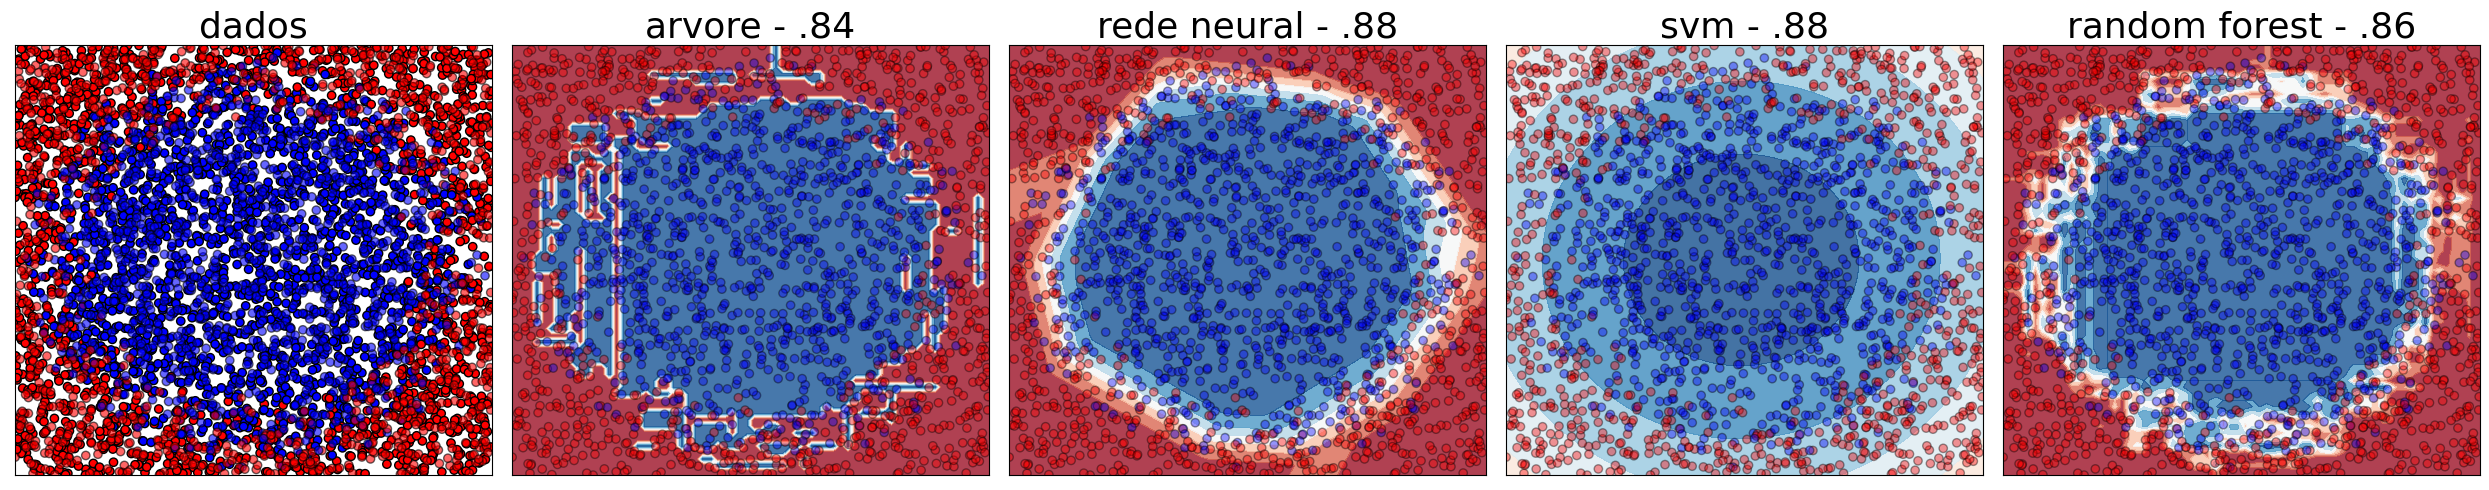

In [39]:
nomes = [
    "arvore",
    "rede neural",
    "svm",
    "random forest"
]

classificadores = [
    tree.DecisionTreeClassifier(),
    MLPClassifier(hidden_layer_sizes=(3, 10,10,10), alpha=1e-5,verbose=False, learning_rate="adaptive",max_iter=500),
    NuSVC(tol=1e-05,verbose=False,gamma="auto"),
    RandomForestClassifier(n_estimators=10,verbose=False)
]


npts = 5000
dados = pd.DataFrame()
x = -1+2*np.random.rand(npts)
y = -1+2*np.random.rand(npts)
lbl = 0.3*(-1+2*np.random.rand(npts))
label = [int(x[i]**2+y[i]**2<0.7+lbl[i]) for i in range(npts)]

dados["x"] = x
dados["y"] = y
dados["label"] = label

X = np.array(dados[["x",'y']])
y = np.array(dados["label"])
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.4, random_state=42)

x_min, x_max = X[:, 0].min() - 0.0, X[:, 0].max() + 0.0
y_min, y_max = X[:, 1].min() - 0.0, X[:, 1].max() + 0.0

figure = plt.figure(figsize=(25, 5))
i = 1
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(classificadores) + 1, i)
ax.set_title("dados",{'fontsize':26})
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())

for nome, clf in zip(nomes, classificadores):
    i+=1
    ax = plt.subplot(1, len(classificadores) + 1, i)

    clf = make_pipeline(preprocessing.MinMaxScaler(feature_range=(0, 1)), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

    # ax.scatter(X_test[:, 0],X_test[:, 1],c=y_test,cmap=cm_bright,edgecolors="k",alpha=0.4)
        
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(nome+" - "+ ("%.2f" % score).lstrip("0"),{'fontsize':26})
    
    # ax.text(
    #         x_max - 0.3,
    #         y_min + 0.3,
    #         ("%.2f" % score).lstrip("0"),
    #         size=15,
    #         horizontalalignment="right",
    #     )


plt.tight_layout()
plt.show()